In [11]:
import tensorflow as tf
from tensorflow.keras import layers, models
import matplotlib.pyplot as plt
import numpy as np

print("TensorFlow version:", tf.__version__)

TensorFlow version: 2.19.0


In [12]:
# 1. Load the data
(train_images, train_labels), (test_images, test_labels) = tf.keras.datasets.mnist.load_data()

# 2. Normalize pixel values to be between 0 and 1
train_images, test_images = train_images / 255.0, test_images / 255.0

# Optional: Check the shape of the data
print(f"Training data shape: {train_images.shape}") # Should be (60000, 28, 28)

Training data shape: (60000, 28, 28)


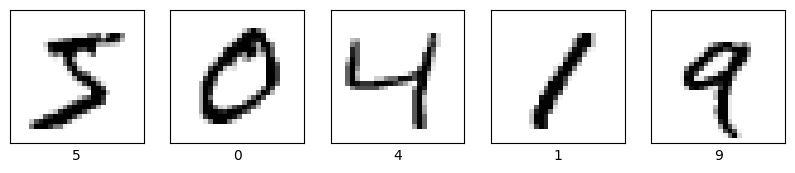

In [13]:
plt.figure(figsize=(10,2))
for i in range(5):
    plt.subplot(1,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(train_labels[i])
plt.show()

In [14]:
model = models.Sequential([
    layers.Flatten(input_shape=(28, 28)),     # Input Layer
    layers.Dense(128, activation='relu'),     # Hidden Layer
    layers.Dropout(0.2),                      # Regularization
    layers.Dense(10, activation='softmax')    # Output Layer
])

model.summary() # Prints a summary of the network

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten_1 (Flatten)             │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 128)            │       100,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 101,770 (397.54 KB)

 Trainable params: 101,770 (397.54 KB)

 Non-trainable params: 0 (0.00 B)

In [15]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [16]:
# Train the model with a validation split
history = model.fit(train_images, train_labels,
                    epochs=5,
                    validation_split=0.1) # Use 10% of training data for validation

Epoch 1/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.8496 - loss: 0.5070 - val_accuracy: 0.9615 - val_loss: 0.1382
Epoch 2/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9537 - loss: 0.1599 - val_accuracy: 0.9713 - val_loss: 0.0986
Epoch 3/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9655 - loss: 0.1122 - val_accuracy: 0.9770 - val_loss: 0.0821
Epoch 4/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9721 - loss: 0.0914 - val_accuracy: 0.9785 - val_loss: 0.0761
Epoch 5/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9760 - loss: 0.0768 - val_accuracy: 0.9780 - val_loss: 0.0805


In [17]:
test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=2)
print(f'\nTest accuracy: {test_acc}')

313/313 - 1s - 2ms/step - accuracy: 0.9737 - loss: 0.0834

Test accuracy: 0.9736999869346619


In [30]:
# Grab the first image from the test set
img = test_images[0]
# Add a batch dimension (models expect a batch of images, not just one)
img = (np.expand_dims(img,0))

# Predict
predictions = model.predict(img)
predicted_label = np.argmax(predictions)

print(f"Predicted Label: {predicted_label}")
print(f"True Label: {test_labels[0]}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
Predicted Label: 7
True Label: 7


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


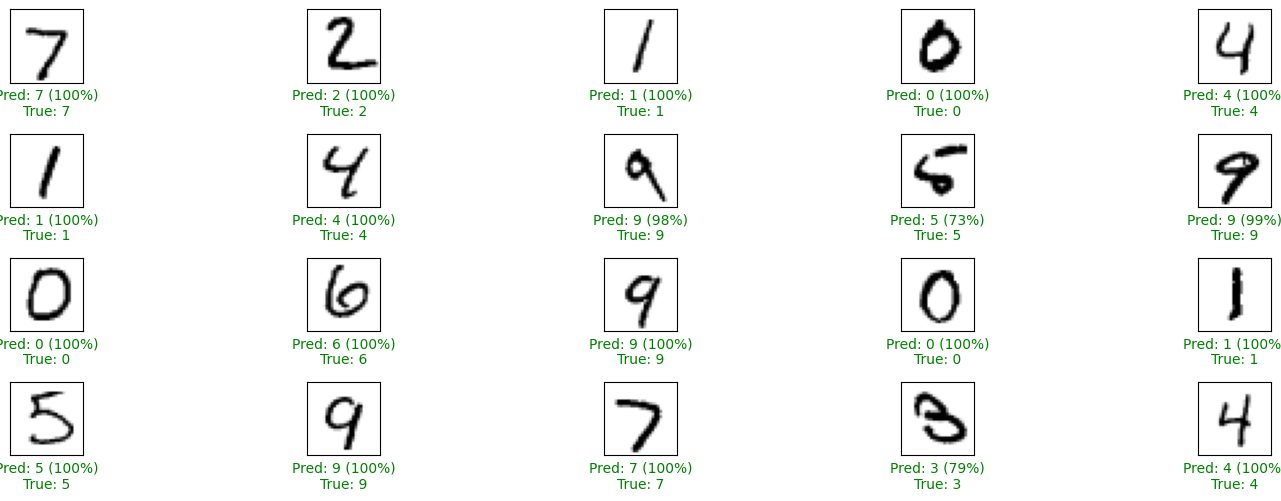

In [32]:
# 1. Get predictions for the first 15 test images
num_images = 20
test_batch = test_images[:num_images]
predictions = model.predict(test_batch)

# 2. Set up the plot
plt.figure(figsize=(15, 6))
cols = 5
rows = num_images // cols + 1

for i in range(num_images):
    plt.subplot(rows, cols, i + 1)

    # Plot the raw image
    plt.imshow(test_batch[i], cmap=plt.cm.binary)

    # Get the predicted label (highest probability) and the true label
    predicted_label = np.argmax(predictions[i])
    true_label = test_labels[i]
    confidence = 100 * np.max(predictions[i])

    # Color code: Green for correct, Red for incorrect
    if predicted_label == true_label:
        color = 'green'
    else:
        color = 'red'

    # Add label with prediction and confidence
    plt.xlabel(f"Pred: {predicted_label} ({confidence:.0f}%)\nTrue: {true_label}",
               color=color)

    # Remove ticks for cleaner look
    plt.xticks([])
    plt.yticks([])

plt.tight_layout()
plt.show()